# Ridge and Lasso Regression

Explore the application of Lasso and Ridge regression using sklearn package in Python. Use the same train and test data with additional augmented columns from [Multiple Linear Regression in Python.ipynb](https://github.com/KezhenY/Advanced_Predictive_Modeling/blob/master/Multiple%20Linear%20Regression%20in%20Python.ipynb). Scale the data so that each of the dependent variables have zero mean and unit variance. I use the [sklearn.preprocessing.scale](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.scale.html) function for this.

In [3]:
# get the data with additional augmented columns

from sklearn import linear_model
from sklearn.metrics import mean_absolute_error
import numpy as np
import pandas as pd
pd.options.mode.chained_assignment = None

train_df = pd.read_csv("reduced_data.csv")
X = train_df.drop(['median_house_value'],axis=1)
Y = train_df['median_house_value']

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.30, random_state=11)

X_train['avg_bedrooms'] = X_train['total_bedrooms']/X_train['households']
X_train['avg_rooms'] = X_train['total_rooms']/X_train['households']
X_train['avg_population'] = X_train['population']/X_train['households']
X_test['avg_bedrooms'] = X_test['total_bedrooms']/X_test['households']
X_test['avg_rooms'] = X_test['total_rooms']/X_test['households']
X_test['avg_population'] = X_test['population']/X_test['households']

Use sklearn.linear_model.Lasso and sklearn.linear_model.Ridge classes to do a [5-fold cross validation](http://scikit-learn.org/stable/auto_examples/exercises/plot_cv_diabetes.html#example-exercises-plot-cv-diabetes-py) using sklearn's [KFold](http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.KFold.html). For the sweep of the regularization parameter, we will look at a grid of values ranging from $\lambda = 10^{10}$ to $\lambda = 10^{-2}$. In Python,  consider this range of values as follows:

      import numpy as np

      alphas =  10**np.linspace(10,-2,100)*0.5

  Report the best chosen $\lambda$ based on cross validation. The cross validation should happen on training data using average MAE as the scoring metric.

In [4]:
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression, Lasso, Ridge, RidgeCV, LassoCV
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn import preprocessing
import matplotlib.pyplot as plt
%matplotlib inline

X_train = X_train.to_numpy()
Y_train = Y_train.to_numpy()
X_test = X_test.to_numpy()
Y_test = Y_test.to_numpy()

X_train = preprocessing.scale(X_train)
X_test = preprocessing.scale(X_test)
#its fine to scale them together and then split also, the answers will
#vary little
#full credit is given to students who use the standard scaler also

n_folds = 5
k_fold = KFold(n_folds)
lasso_alphas =  10**np.linspace(10,-2,100)*0.5       #(start at 10, end at -2 )           
lasso_avg_rmse = {}

for alpha in lasso_alphas:
    lasso = linear_model.Lasso(alpha=alpha, tol=0.1)
    avg_mse = 0
    for k, (train, test) in enumerate(k_fold.split(X_train, Y_train)):
        lasso.fit(X_train[train], Y_train[train])
        avg_mse = avg_mse + mean_squared_error(Y_train[test], lasso.predict(X_train[test])) 
    lasso_avg_rmse[alpha] = avg_mse / n_folds
print(lasso_avg_rmse[0.005]) #since many ppl in the class reported this 
print(lasso_avg_rmse[66.09705742330144])
best_alpha_lasso = min(lasso_avg_rmse, key=lasso_avg_rmse.get)


print("Best lasso alpha: {}".format(best_alpha_lasso))
print("full credit is awarded for 0.05 also")

ridge_alphas =  10**np.linspace(10,-2,100)*0.5
ridge_avg_rmse = {}

for alpha in ridge_alphas:
    ridge = linear_model.Ridge(alpha=alpha)
    avg_mse = 0
    for k, (train, test) in enumerate(k_fold.split(X_train, Y_train)):
        ridge.fit(X_train[train], Y_train[train])
        avg_mse = avg_mse + mean_squared_error(Y_train[test], ridge.predict(X_train[test])) 
    ridge_avg_rmse[alpha] = avg_mse / n_folds
best_alpha_ridge = min(ridge_avg_rmse, key=ridge_avg_rmse.get)
# print(min(ridge_avg_rmse))
print("Best ridge alpha: {}".format(best_alpha_ridge))
print("full credit is awarded for students using standrad scaler also")

4828842586.394724
4825614296.808476
Best lasso alpha: 66.09705742330144
full credit is awarded for 0.05 also
Best ridge alpha: 37.823166377731454
full credit is awarded for students using standrad scaler also


Run ridge and lasso for all of the alphas specified above (on training data), and plot the coefficients learned for each of them - there should be one plot each for lasso and ridge, so a total of two plots; the plots for different features for a method should be on the same plot. Observe qualitatively when value of the regularization parameter is changed.

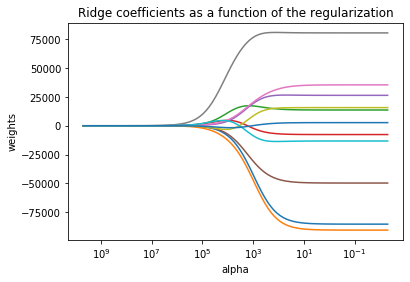

In [5]:
alphas = 10**np.linspace(10,-2,100)*0.5 

ridge = linear_model.Ridge(alpha=alpha)
coefs = []

for a in alphas:
    ridge.set_params(alpha=a)
    ridge.fit(X_train, Y_train)
    coefs.append(ridge.coef_)

ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization');

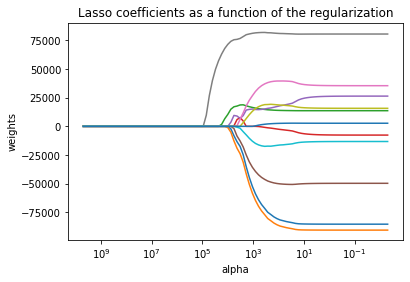

In [6]:
alphas = 10**np.linspace(10,-2,100)*0.5  #start at 10 stop at -2 give 100 numbers

lasso = linear_model.Lasso(alpha=alpha,tol=.1)
coefs = []

for a in alphas:
    lasso.set_params(alpha=a,tol=.1)
    lasso.fit(X_train, Y_train)
    coefs.append(lasso.coef_)

ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Lasso coefficients as a function of the regularization');

Run least squares regression, ridge, and lasso on the training data. For ridge and lasso, use only the best regularization parameter. Report the prediction error (MAE) on the test data for each.

In [7]:
linear_clf = linear_model.LinearRegression()
ridge_clf = linear_model.Ridge(alpha=best_alpha_ridge)
lasso_clf = linear_model.Lasso(alpha=best_alpha_lasso,tol=.1)#, max_iter=100000)#,tol=1)

def fit_reg(model, name):
    model.fit(X_train, Y_train)
    pred = model.predict(X_test)
    mse = mean_absolute_error(pred, Y_test)
    print("MSE for {0}: {1}".format(name, mse))

fit_reg(linear_clf, "linear")
fit_reg(ridge_clf, "ridge")
fit_reg(lasso_clf, "lasso") #many students reorted a higher mse for lasso, but are awarded full credit

MSE for linear: 50682.397574551534
MSE for ridge: 50635.1150325643
MSE for lasso: 50657.45620173661


Run lasso again with cross validation using [sklearn.linear_model.LassoCV](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html). Set the cross validation parameters as follows:

    LassoCV(alphas=None, cv=10, max_iter=10000)

Report the best $\lambda$ based on cross validation. Run lasso on the training data using the best $\lambda$ and report the coefficeints for all variables.




In [8]:
lassocv = LassoCV(alphas=None, cv=10, max_iter=1000000)
lassocv.fit(X_train, Y_train)

LassoCV(alphas=None, copy_X=True, cv=10, eps=0.001, fit_intercept=True,
        max_iter=1000000, n_alphas=100, n_jobs=None, normalize=False,
        positive=False, precompute='auto', random_state=None,
        selection='cyclic', tol=0.0001, verbose=False)

In [9]:
lassocv.alpha_

161.80167643776653

In [10]:
lasso = linear_model.Lasso(alpha=lassocv.alpha_)
lasso.fit(X_train, Y_train)
mse = mean_absolute_error(Y_test, lasso.predict(X_test))
print(mse)
print(lasso.coef_)

50681.95000148011
[-83729.40788737 -88966.60778197  13793.24655891  -5441.52359581
  24891.29887821 -48359.51663192  33593.70067617  79916.03828368
  14815.92067716 -12517.52849661   2360.88791625]


We have to scale the data before regularization. Scaling is done before regularization to ensure that all parameters are penalized equally. If different variables have different scale of values, then their corresponding parameters will also be in a different scale and hence will be penalized unequally during regularization.

As the number of instances for training is increased, the model is able to generalise better which is indicated by improvement in performance on the test data. The performance on the train data may improve or deteriorate depending upon the percentage of noise in the data. On the other hand, the decrease in the size of the training data causes the model to overfit.